## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], regularizer=None, l_ratio=None):
    input_layer = keras.layers.Input(input_shape)
    
    if regularizer == 'l1':
        rl = l1(l_ratio)
    elif regularizer == 'l2':
        rl = l2(l_ratio)
    elif regularizer == 'l1_l2':
        rl = l1_l2(l_ratio)
    else:
        rl = None
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=rl)(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=rl)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
REGULARIZER = [None, 'l1', 'l2', 'l1_l2', 'l1', 'l1_l2']
L_EXP = [0, 1e-4, 1e-4, 1e-4, 1e-8, 1e-8]

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regular, l_ratio in zip(REGULARIZER, L_EXP):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer (%s) = %.6f" % (str(regular), l_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], regularizer=regular, l_ratio=l_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    if regular is None:
        exp_name_tag = "exp-noreg"
    else:
        exp_name_tag = "exp-%s-%s" % (str(regular), str(l_ratio))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer (None) = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============

Epoch 1/50
50000/50000 [==============================] - 2s 40us/step - loss: 5.9954 - acc: 0.2697 - val_loss: 5.8097 - val_acc: 0.3438
Epoch 2/50
50000/50000 [==============================] - 2s 32us/step - loss: 5.7101 - acc: 0.3652 - val_loss: 5.6350 - val_acc: 0.3810
Epoch 3/50
50000/50000 [==============================] - 2s 33us/step - loss: 5.5629 - acc: 0.3965 - val_loss: 5.5037 - val_acc: 0.4000
Epoch 4/50
50000/50000 [==============================] - 2s 33us/step - loss: 5.4415 - acc: 0.4176 - val_loss: 5.3871 - val_acc: 0.4233
Epoch 5/50
50000/50000 [==============================] - 2s 33us/step - loss: 5.3332 - acc: 0.4366 - val_loss: 5.2860 - val_acc: 0.4409
Epoch 6/50
50000/50000 [==============================] - 2s 33us/step - loss: 5.2327 - acc: 0.4469 - val_loss: 5.1988 - val_acc: 0.4491
Epoch 7/50
50000/50000 [==============================] - 2s 34us/step - loss: 5.1419 - acc: 0.4593 - val_loss: 5.1202 - val_acc: 0.4524
Epoch 8/50
50000/50000 [=================

50000/50000 [==============================] - 2s 33us/step - loss: 1.9582 - acc: 0.3643 - val_loss: 1.9084 - val_acc: 0.3892
Epoch 3/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.8708 - acc: 0.3968 - val_loss: 1.8399 - val_acc: 0.4046
Epoch 4/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.8105 - acc: 0.4195 - val_loss: 1.7919 - val_acc: 0.4242
Epoch 5/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.7630 - acc: 0.4343 - val_loss: 1.7437 - val_acc: 0.4359
Epoch 6/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.7229 - acc: 0.4470 - val_loss: 1.7145 - val_acc: 0.4481
Epoch 7/50
50000/50000 [==============================] - 2s 32us/step - loss: 1.6871 - acc: 0.4597 - val_loss: 1.6814 - val_acc: 0.4595
Epoch 8/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.6566 - acc: 0.4687 - val_loss: 1.6680 - val_acc: 0.4588
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 34us/step - loss: 13.9585 - acc: 0.3820 - val_loss: 12.9751 - val_acc: 0.3938
Epoch 4/50
50000/50000 [==============================] - 2s 33us/step - loss: 12.1090 - acc: 0.3968 - val_loss: 11.2758 - val_acc: 0.4077
Epoch 5/50
50000/50000 [==============================] - 2s 33us/step - loss: 10.5392 - acc: 0.4048 - val_loss: 9.8252 - val_acc: 0.4106
Epoch 6/50
50000/50000 [==============================] - 2s 34us/step - loss: 9.2008 - acc: 0.4124 - val_loss: 8.5953 - val_acc: 0.4171
Epoch 7/50
50000/50000 [==============================] - 2s 34us/step - loss: 8.0633 - acc: 0.4169 - val_loss: 7.5446 - val_acc: 0.4240
Epoch 8/50
50000/50000 [==============================] - 2s 34us/step - loss: 7.0930 - acc: 0.4209 - val_loss: 6.6569 - val_acc: 0.4246
Epoch 9/50
50000/50000 [==============================] - 2s 33us/step - loss: 6.2661 - acc: 0.4241 - val_loss: 5.8996 - val_acc: 0.4260
Epoch 10/50
50000/50000 [======================

50000/50000 [==============================] - 2s 33us/step - loss: 1.6560 - acc: 0.4182 - val_loss: 1.6464 - val_acc: 0.4234
Epoch 5/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.6116 - acc: 0.4355 - val_loss: 1.6019 - val_acc: 0.4412
Epoch 6/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.5738 - acc: 0.4477 - val_loss: 1.5745 - val_acc: 0.4440
Epoch 7/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.5430 - acc: 0.4605 - val_loss: 1.5523 - val_acc: 0.4519
Epoch 8/50
50000/50000 [==============================] - 2s 32us/step - loss: 1.5158 - acc: 0.4680 - val_loss: 1.5275 - val_acc: 0.4654
Epoch 9/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.4887 - acc: 0.4774 - val_loss: 1.5119 - val_acc: 0.4662
Epoch 10/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.4633 - acc: 0.4877 - val_loss: 1.4933 - val_acc: 0.4696
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 2s 33us/step - loss: 8.7304 - acc: 0.4087 - val_loss: 8.1920 - val_acc: 0.4106
Epoch 6/50
50000/50000 [==============================] - 2s 34us/step - loss: 7.7070 - acc: 0.4186 - val_loss: 7.2446 - val_acc: 0.4245
Epoch 7/50
50000/50000 [==============================] - 2s 34us/step - loss: 6.8348 - acc: 0.4249 - val_loss: 6.4459 - val_acc: 0.4253
Epoch 8/50
50000/50000 [==============================] - 2s 34us/step - loss: 6.0911 - acc: 0.4305 - val_loss: 5.7775 - val_acc: 0.4242
Epoch 9/50
50000/50000 [==============================] - 2s 34us/step - loss: 5.4553 - acc: 0.4354 - val_loss: 5.1802 - val_acc: 0.4362
Epoch 10/50
50000/50000 [==============================] - 2s 34us/step - loss: 4.9113 - acc: 0.4412 - val_loss: 4.6723 - val_acc: 0.4413
Epoch 11/50
50000/50000 [==============================] - 2s 34us/step - loss: 4.4479 - acc: 0.4446 - val_loss: 4.2420 - val_acc: 0.4451
Epoch 12/50
50000/50000 [=========================

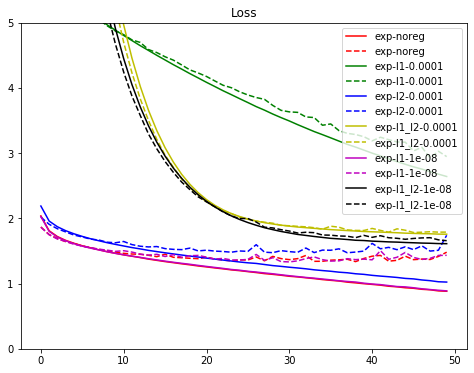

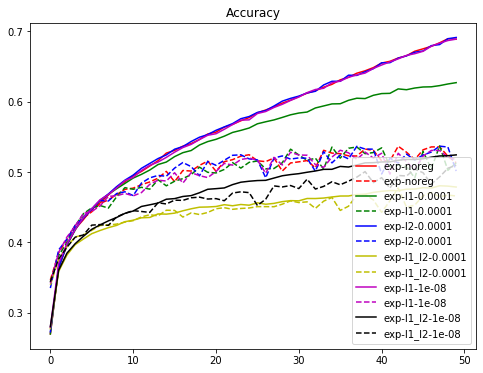

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()